In [32]:
import numpy as np
import matplotlib.pyplot as plt

Plot both continuous and discrete signals of the function 


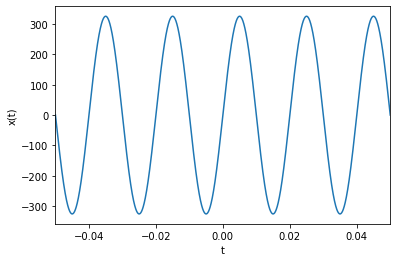

In [34]:
# continuous signals
t = np.linspace(-0.05, 0.05, 10000)
equation = 325 * np.sin(2*np.pi*50*t)
plt.figure()
plt.plot(t, equation)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.xlim([-0.05, 0.05])
plt.show()

And also the discrete signals. Where n is sampled from 0 to 50. 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

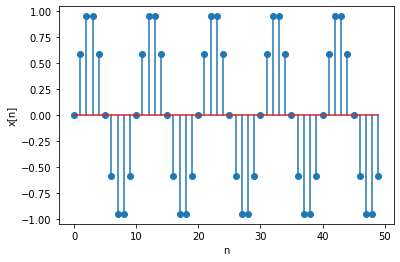

In [35]:
# discrete signals 
n = np.arange(50) # sampled from 0 to 50: x[50]
dt = (0.05+0.05)/50
x = np.sin(2*np.pi*50*n*dt)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, x)

2.

TypeError: ignored

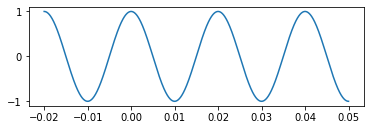

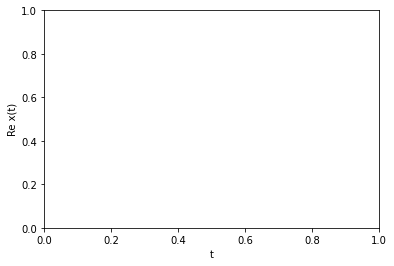

In [45]:
t = np.linspace(-0.02, 0.05, 1000)
plt.subplot(2,1,1); plt.plot(t, np.exp(2j*np.pi*50*t).real );
plt.figure()
plt.xlabel('t');
plt.ylabel('Re x(t)');
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.xlim([-0.02, 0.05]);
plt.subplot(2,1,2); plt.plot(t, np.exp(2j*np.pi*50*t).imag );
plt.xlabel('t');
plt.ylabel('Im x(t)');
plt.xlim([-0.02, 0.05]);
plt.plot()


[]

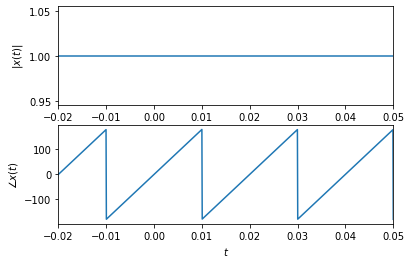

In [38]:
t = np.linspace(-0.02, 0.05, 1000)

plt.subplot(2,1,1)
plt.plot(t, np.abs(np.exp(2j*np.pi*50*t)));
plt.xlabel(r'$t$');
plt.ylabel(r'$|x(t)|$');
plt.xlim([-0.02, 0.05]);
plt.subplot(2,1,2); plt.plot(t, np.angle(np.exp(2j*np.pi*50*t))*360/(2*np.pi))
plt.xlabel('$t$');
plt.ylabel(r'$\angle x(t)$');
plt.xlim([-0.02, 0.05]);
plt.plot()

6.(25pts) Pyramid Blending: Write a program that takes an input two color images and a binary mask images and produces the Laplacian pyramid blend of the two images.

•	Construct the Laplacian pyramid for each image.\
•	Construct the Gaussian pyramid for the two mask images (the input image and its complement).\
•	Multiply each Laplacian image by its corresponding mask and sum the images.\
•	Reconstruct the final image from the Blended Laplacian pyramid. 
